# Exports and Imports of India

In this project, we'll analyze the export-import of India dataset. This dataset contain trade data of India with countries from 1997 to July 2022. You can find the raw data & official analysis here: https://www.kaggle.com/datasets/ramjasmaurya/exports-and-imports-of-india19972022

## Downloading the Dataset

We'll use the opendatasets helper library to download the files.

In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/ramjasmaurya/exports-and-imports-of-india19972022' 

In [3]:
import opendatasets as od
od.download(dataset_url)

100%|██████████| 92.4k/92.4k [00:00<00:00, 194kB/s]

The dataset has been downloaded and extracted.

In [1]:
data_dir = './exports-and-imports-of-india19972022'

In [2]:
import os
os.listdir(data_dir)

['exports_imports.csv']

In [6]:
#project_name = "exports-and-imports-of-india" 

## Data Preparation and Cleaning

This dataset contain lots of information about trade of India with other countries. Let's explore----



In [3]:
import pandas as pd

In [4]:
raw_df = pd.read_csv('./exports-and-imports-of-india19972022/exports_imports.csv')

In [5]:
raw_df

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,1997,1998
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,1998,1999
2,AFGHANISTAN,33.2,21.06,54.26,12.15,1999,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002
...,...,...,...,...,...,...,...
5989,ZIMBABWE,181.72,7.79,189.51,173.93,2018,2019
5990,ZIMBABWE,161.13,13.59,174.72,147.54,2019,2020
5991,ZIMBABWE,175.72,5.71,181.42,170.01,2020,2021
5992,ZIMBABWE,200.49,7.77,208.27,192.72,2021,2022


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                5994 non-null   object
 1   Export                 5986 non-null   object
 2   Import                 5442 non-null   object
 3   Total Trade            5409 non-null   object
 4   Trade Balance          5408 non-null   object
 5   Financial Year(start)  5994 non-null   int64 
 6   Financial Year(end)    5994 non-null   object
dtypes: int64(1), object(6)
memory usage: 327.9+ KB


In [7]:
raw_df.describe()

,Financial Year(start)
count,5994.000000
mean,2009.596096
std,7.460527
min,1997.000000
25%,2003.000000
50%,2010.000000
75%,2016.000000
max,2022.000000


In [8]:
export_null = pd.isnull(raw_df['Export'])

In [9]:
raw_df[export_null]

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
1075,CHANNEL IS,NaN,NaN,NaN,NaN,2014,2015
1149,COCOS IS,NaN,NaN,NaN,NaN,1998,1999
2235,GUERNSEY,NaN,NaN,NaN,NaN,2018,2019
2236,GUERNSEY,NaN,NaN,NaN,NaN,2019,2020
2237,GUERNSEY,NaN,NaN,NaN,NaN,2020,2021
4049,PACIFIC IS,NaN,NaN,NaN,NaN,2008,2009
4931,ST KITT N A,NaN,NaN,NaN,NaN,2000,2001
5695,UNION OF SERBIA & MONTENEGRO,NaN,NaN,NaN,NaN,2019,2020


Here we need to replace NAN with zero and also in blank space fill with zero, only in Export and Import column

In [10]:
#filling NAN with zero
raw_df['Export'].fillna('0', inplace= True)
raw_df['Import'].fillna('0', inplace= True)

In [11]:
#filling blank with zero
df1 = raw_df[['Export', 'Import']].replace('', 0)

In [12]:
#replacing (comma 1,333) from number and converting dtype from object to float 
raw_df['Export'] = df1['Export'].str.replace(',', '').astype(float)
raw_df['Import'] = df1['Import'].str.replace(',', '').astype(float)

In [13]:
raw_df['Total Trade'] = raw_df['Export'] + raw_df['Import']

In [14]:
raw_df['Trade Balance'] = raw_df['Export'] - raw_df['Import']

In [15]:
raw_df['Financial Year(end)'] = pd.to_numeric(raw_df['Financial Year(end)'].replace('till now', '2022'))

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                5994 non-null   object 
 1   Export                 5994 non-null   float64
 2   Import                 5994 non-null   float64
 3   Total Trade            5994 non-null   float64
 4   Trade Balance          5994 non-null   float64
 5   Financial Year(start)  5994 non-null   int64  
 6   Financial Year(end)    5994 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 327.9+ KB


In [17]:
raw_df['Country'].nunique()

250

In [18]:
country_df = raw_df.groupby('Country')[['Export', 'Import', 'Total Trade', 'Trade Balance']].sum()

In [19]:
country_df

,Export,Import,Total Trade,Trade Balance
Country,,,,
AFGHANISTAN,9207.30,4687.25,13894.55,4520.05
ALBANIA,416.17,597.68,1013.85,-181.51
ALGERIA,13028.14,17719.93,30748.07,-4691.79
AMERI SAMOA,9.50,95.03,104.53,-85.53
ANDORRA,8.91,5.74,14.65,3.17
...,...,...,...,...
VIRGIN IS US,249.38,35.72,285.10,213.66
WALLIS F IS,2.80,1.37,4.17,1.43
YEMEN REPUBLC,15002.08,11736.39,26738.47,3265.69


## Exploratory Analysis and Visualization

**Now the dataset is ready for analysis and graphing** 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (20, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

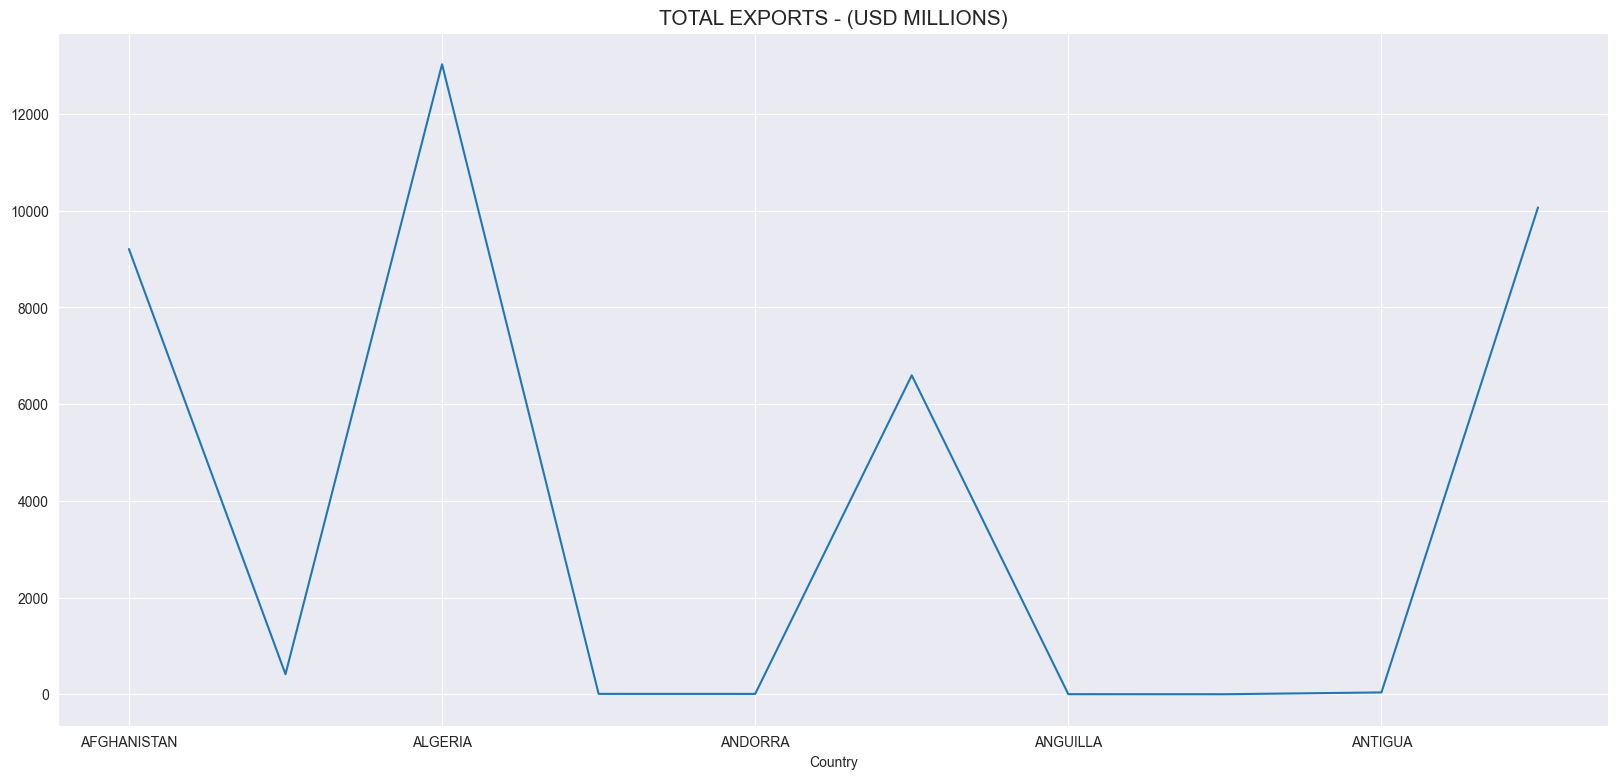

In [50]:
highest_export = country_df.Export.head(10)
highest_export.plot()
plt.title('TOTAL EXPORTS - (USD MILLIONS)', size = 15);

<Axes: title={'center': 'TOTAL EXPORTS - (USD MILLIONS)'}, xlabel='Export', ylabel='Country'>

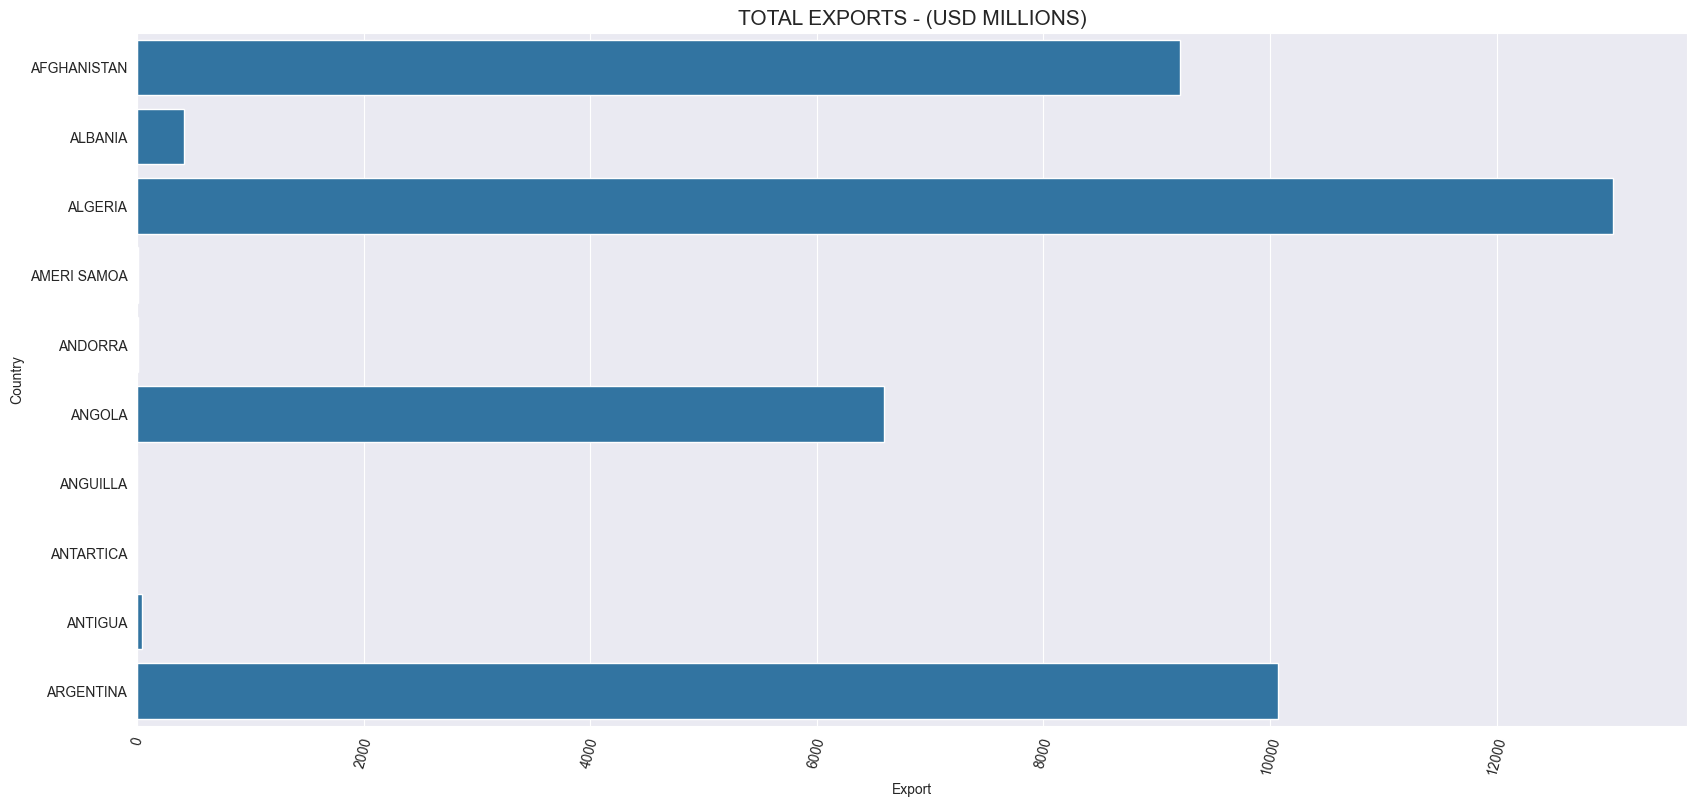

In [52]:
#plt.figure(figsize=(50,50))
plt.xticks(rotation=75)
plt.title('TOTAL EXPORTS - (USD MILLIONS)', size = 15);
sns.barplot(highest_export, orient='h')

The above graph shows total export of the country with India from 1997 to 2022. As we can see, USA is the highest importer of goods from India.

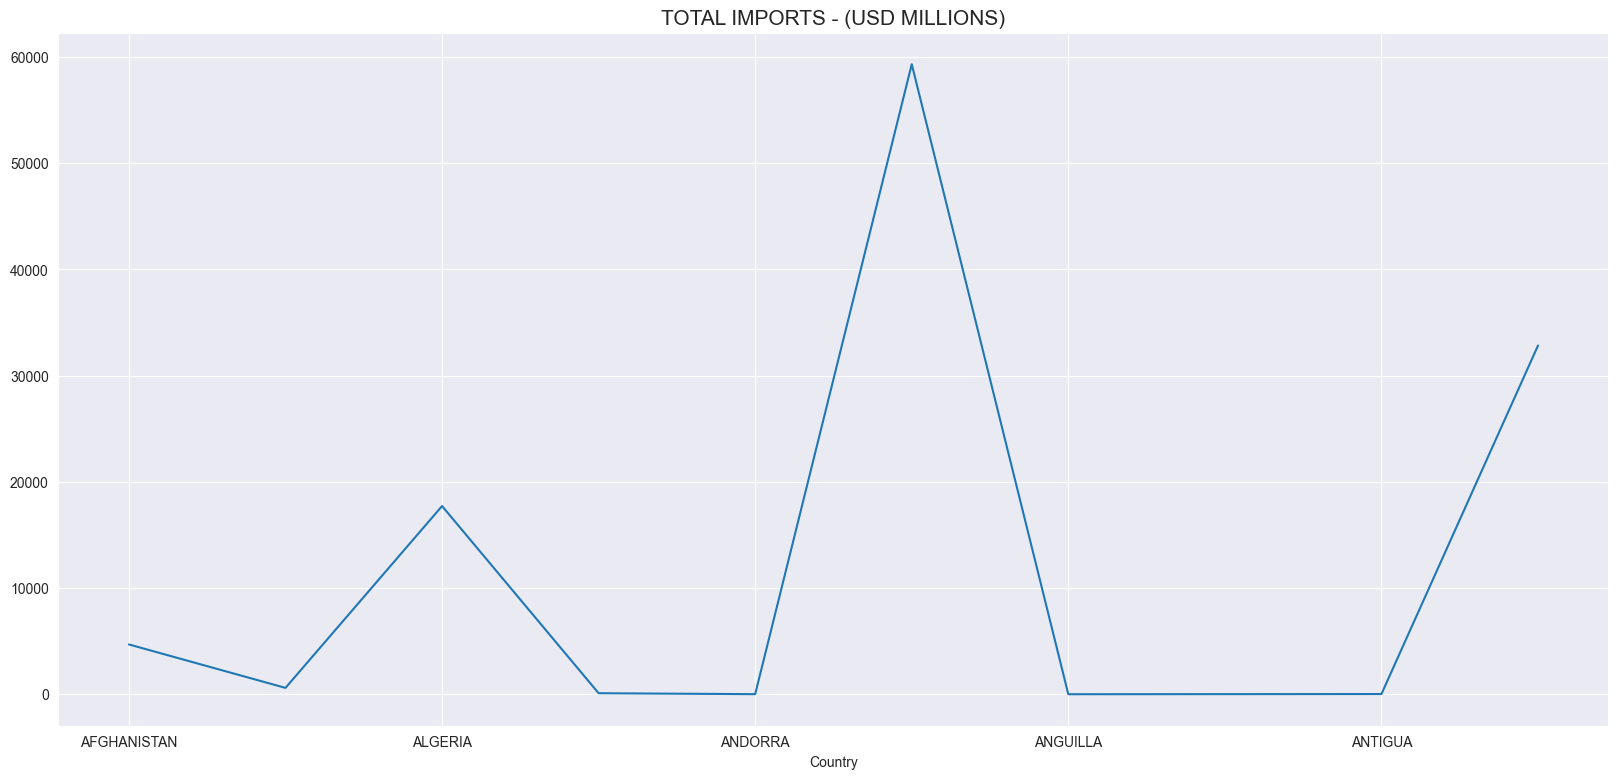

In [54]:
highest_import = country_df.Import.head(10)
highest_import.plot()
plt.title('TOTAL IMPORTS - (USD MILLIONS)', size = 15);

<Axes: title={'center': 'TOTAL IMPORTS - (USD MILLIONS)'}, xlabel='Import', ylabel='Country'>

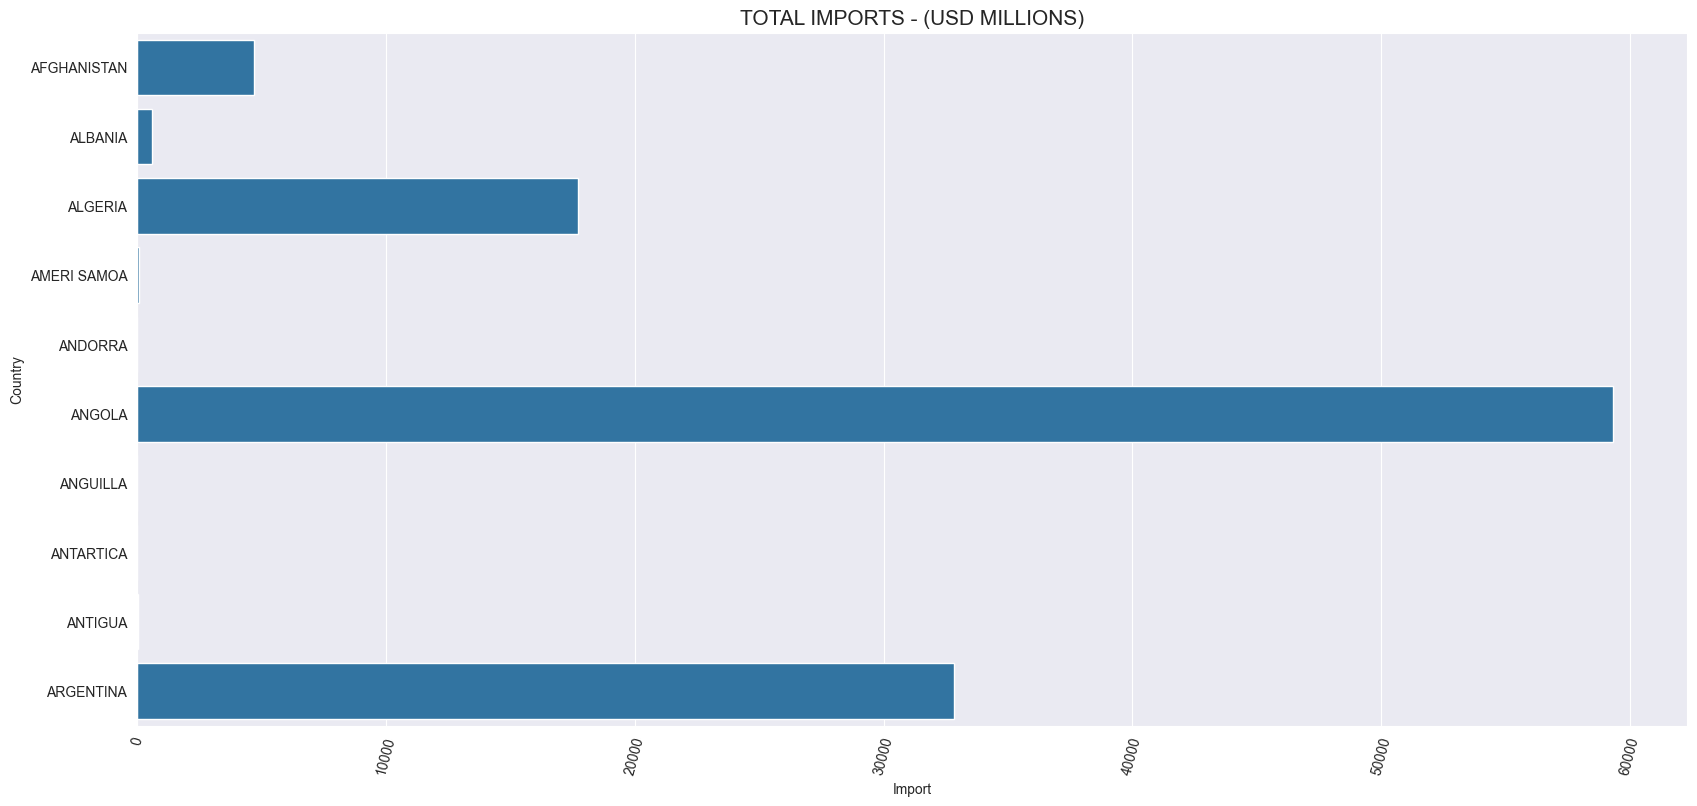

In [55]:
#plt.figure(figsize=(50,50))
plt.xticks(rotation=75)
plt.title('TOTAL IMPORTS - (USD MILLIONS)', size = 15);
sns.barplot(highest_import, orient='h')

The above graph shows total import of India from the other countries from 1997 to 2022. AS we can see, China is the highest exporter of goods to India.

Text(0.5, 1.0, 'TOTAL IMPORTS AND EXPORTS - (USD MILLIONS)')

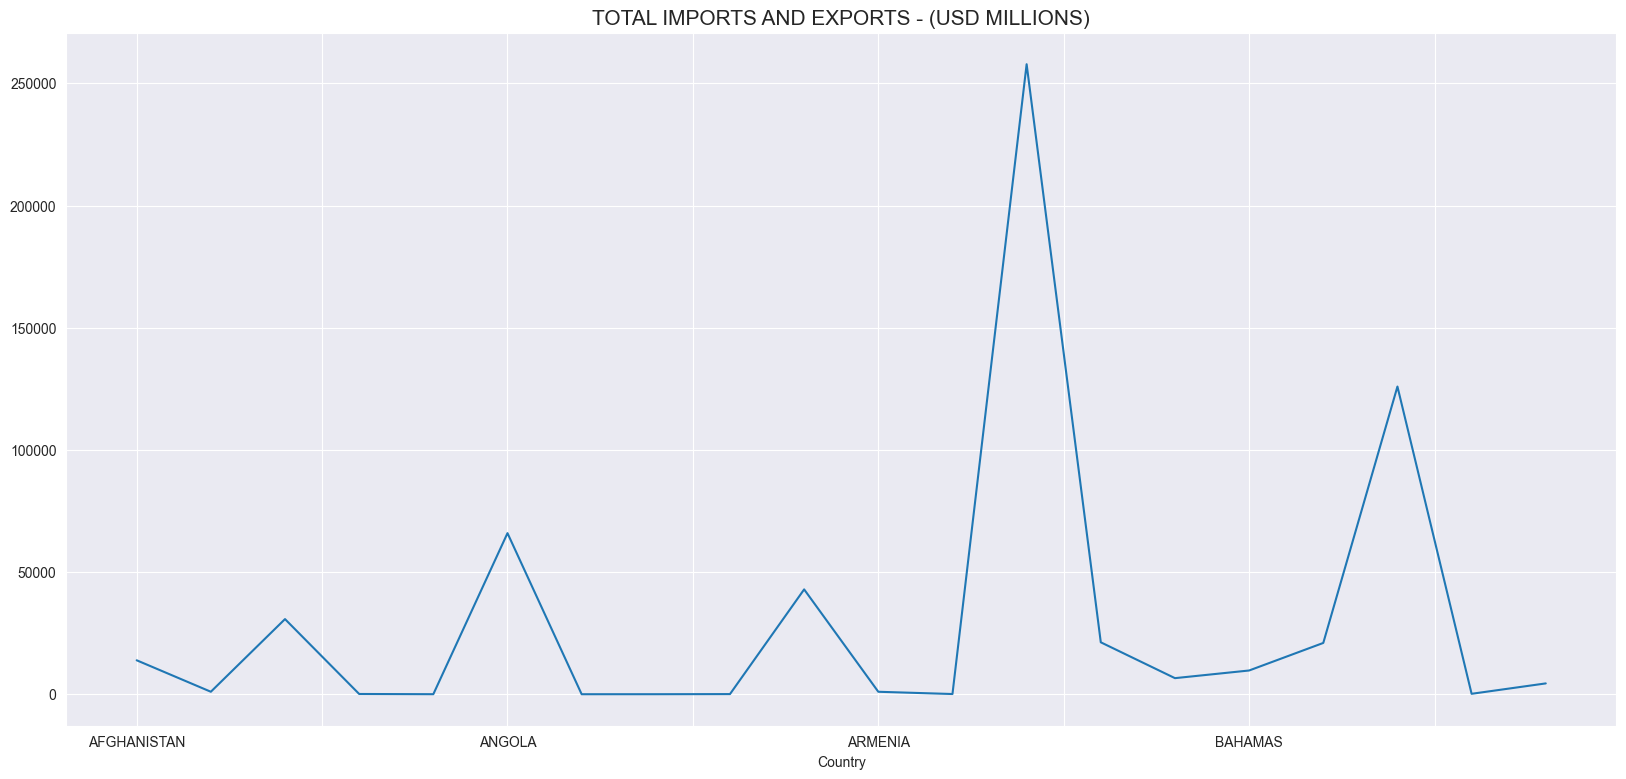

In [63]:
country_df['Total Trade'].head(20).plot()
plt.title('TOTAL IMPORTS AND EXPORTS - (USD MILLIONS)', size = 15)

<Axes: title={'center': 'TOTAL IMPORTS AND EXPORTS - (USD MILLIONS)'}, xlabel='Country', ylabel='Total Trade'>

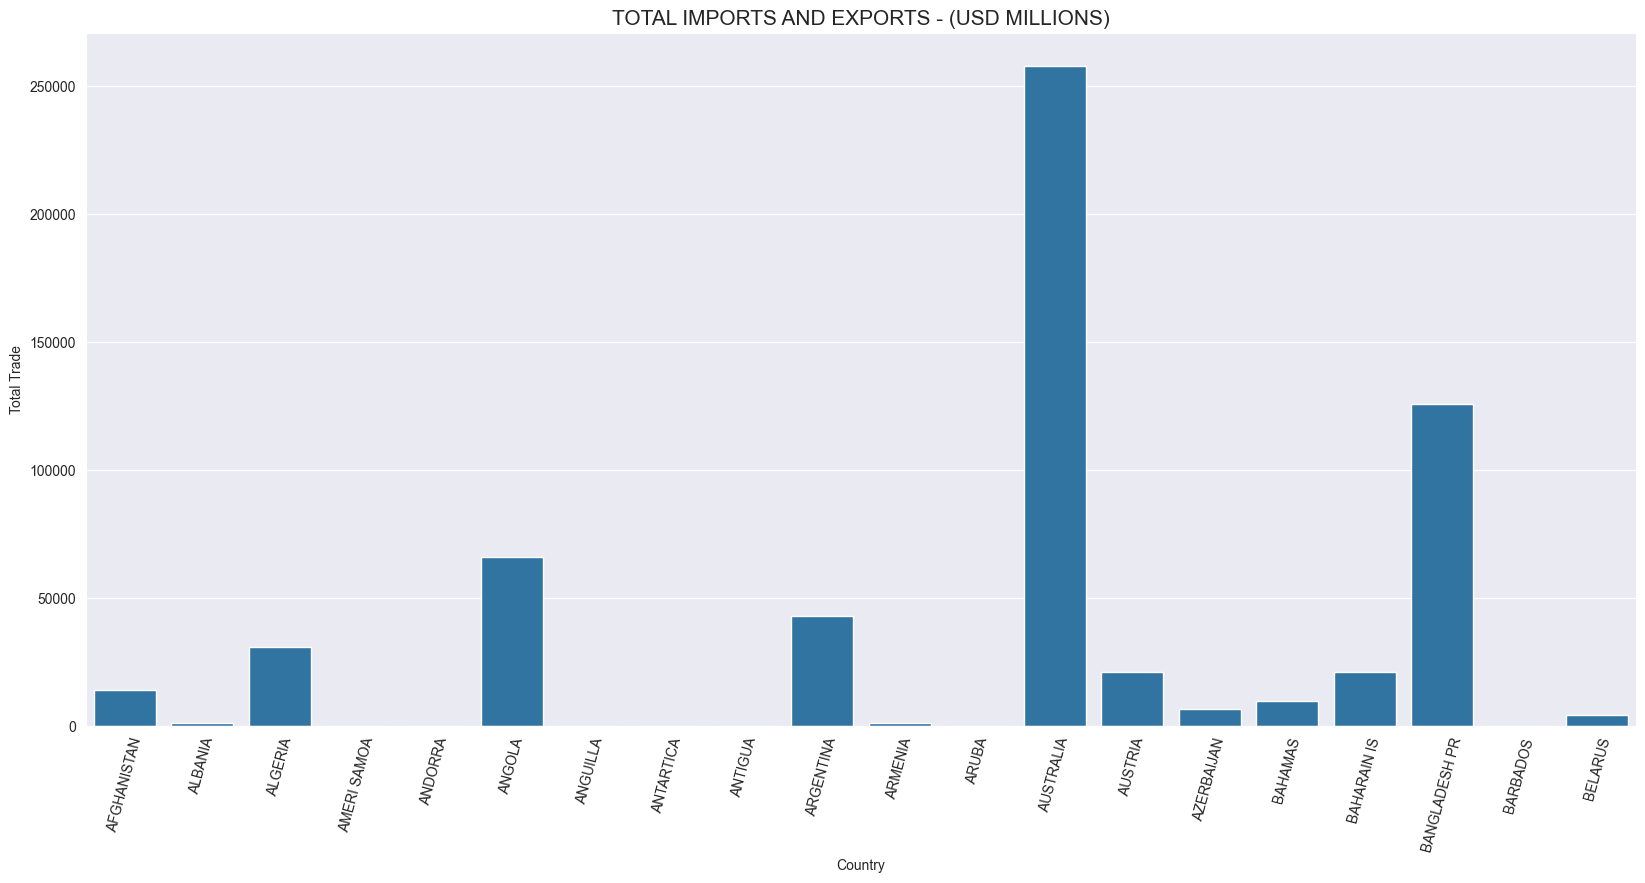

In [62]:
#plt.figure(figsize=(50,50))
plt.xticks(rotation=75)
plt.title('TOTAL IMPORTS AND EXPORTS - (USD MILLIONS)', size = 15)
sns.barplot(country_df['Total Trade'].head(20))

The above graph shows total trade (export+import) of the country with India from 1997 to 2022. As we can see, India mostly traded with USA and China.

Text(0.5, 1.0, 'TRADE BALANCE - (USD MILLIONS)')

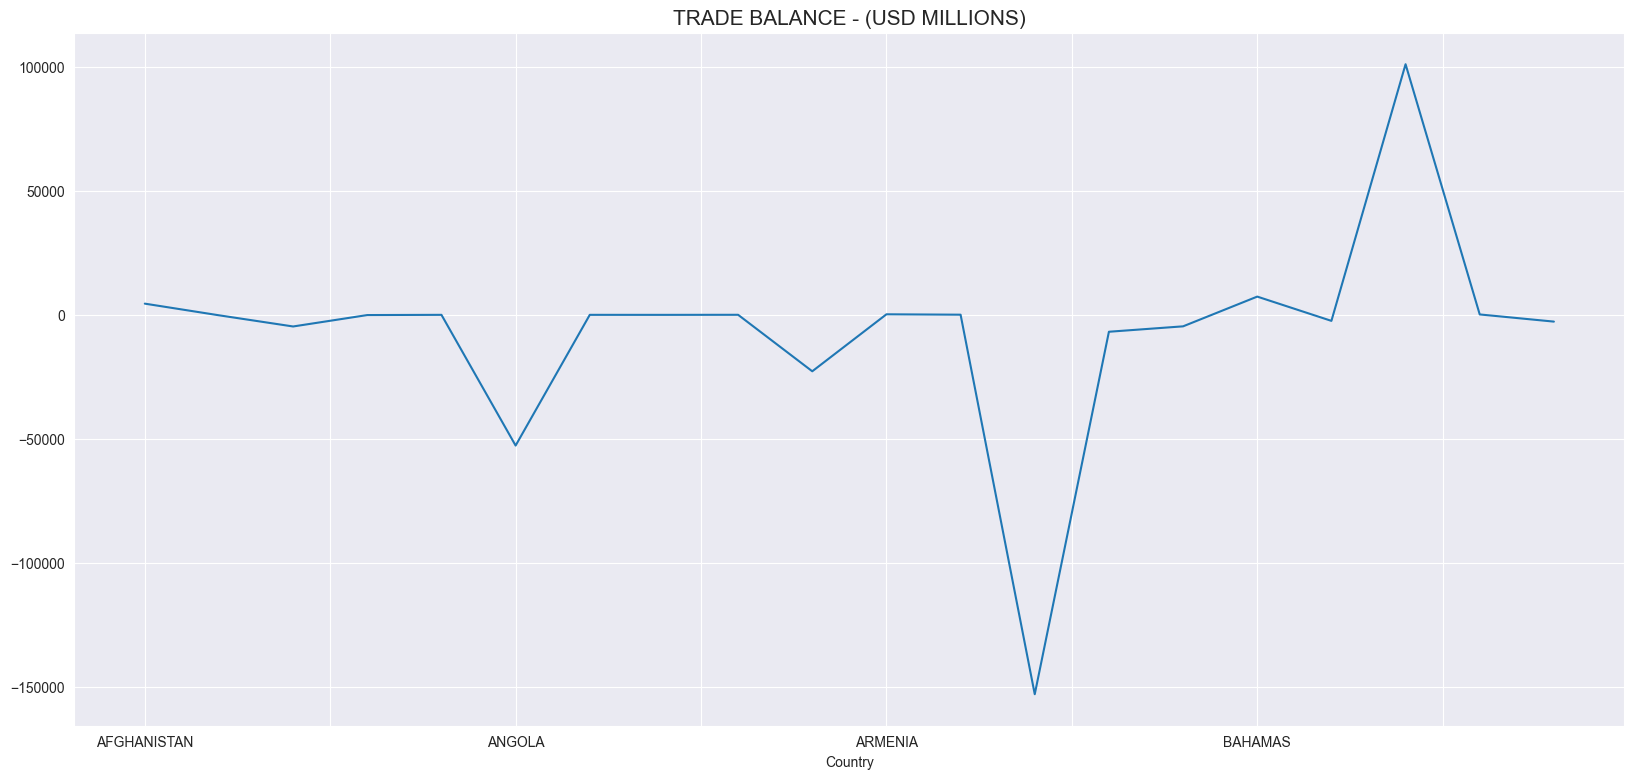

In [69]:
country_df['Trade Balance'].head(20).plot()
plt.title('TRADE BALANCE - (USD MILLIONS)', size = 15)

<Axes: title={'center': 'TRADE BALANCE - (USD MILLIONS)'}, xlabel='Country', ylabel='Trade Balance'>

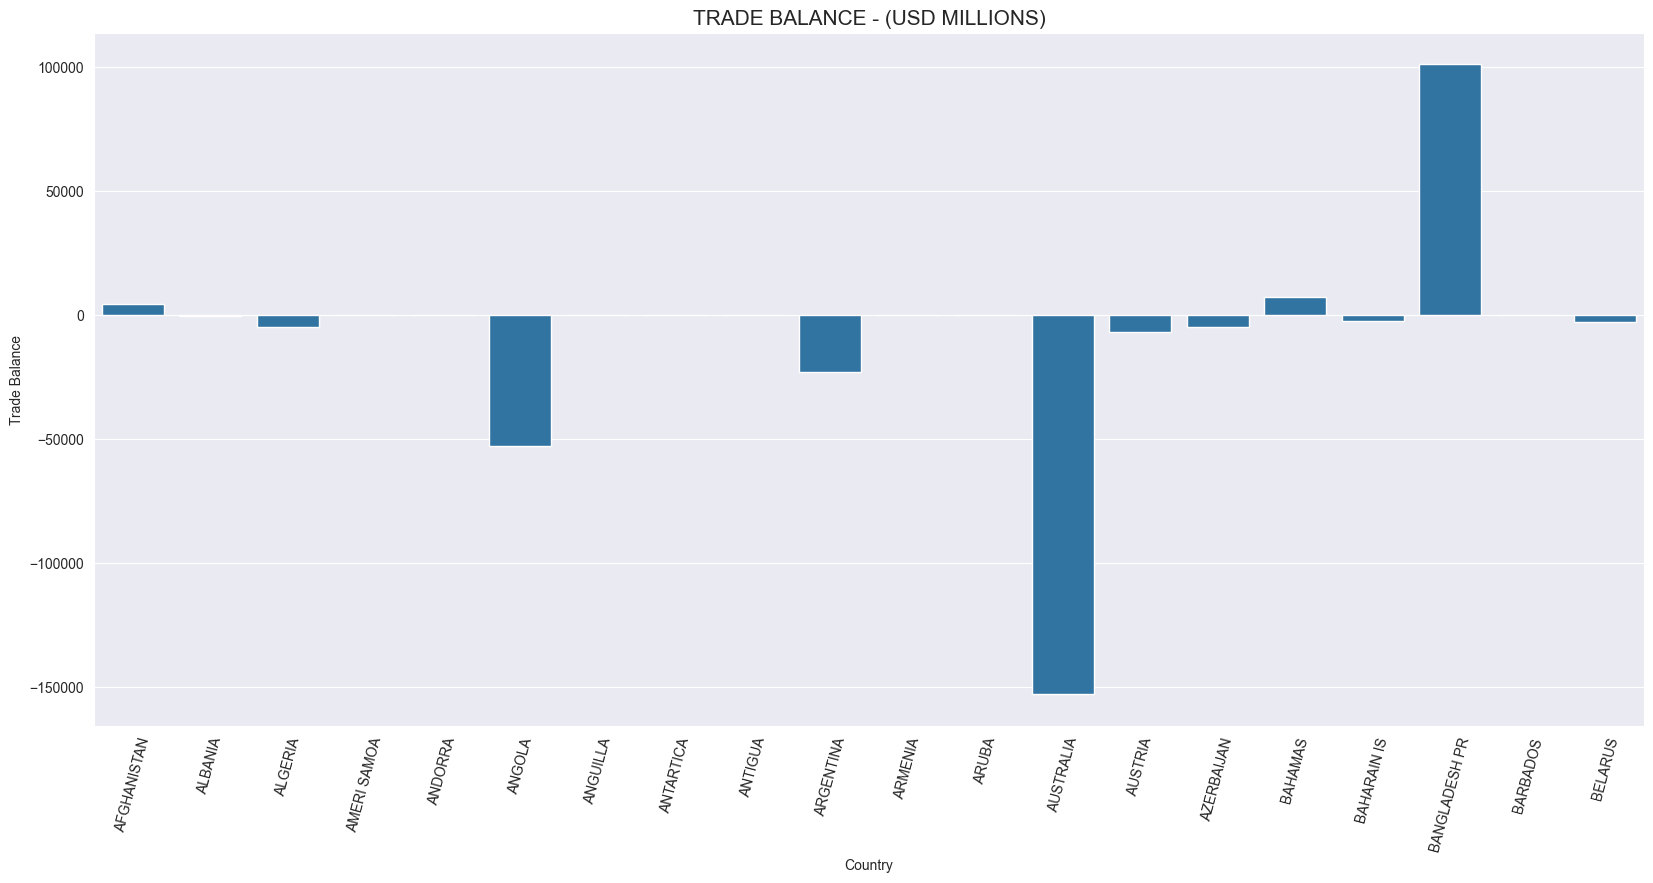

In [68]:
#plt.figure(figsize=(50,50))
plt.xticks(rotation=75)
plt.title('TRADE BALANCE - (USD MILLIONS)', size = 15)
sns.barplot(country_df['Trade Balance'].head(20))

The above graph shows trade balance (export-import) of India with other country. Positive value shows India export more than import in that country (USA as in graph). Negative value shows India import more than export from that country (Chins as in graph).

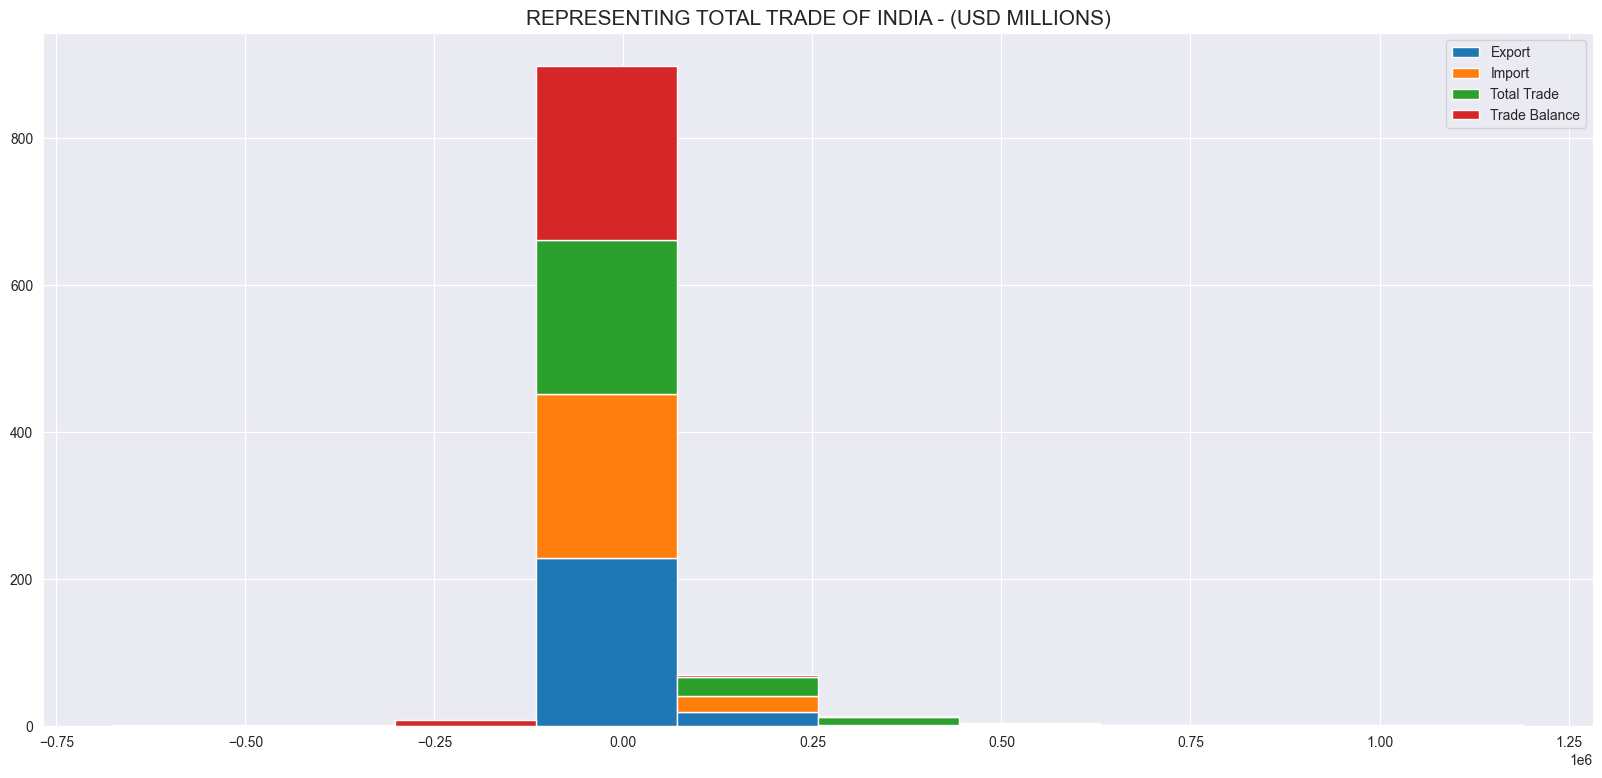

In [70]:
plt.hist([country_df.Export, country_df.Import, country_df['Total Trade'], country_df['Trade Balance']], stacked=True);
plt.legend(['Export', 'Import', 'Total Trade', 'Trade Balance']);
plt.title('REPRESENTING TOTAL TRADE OF INDIA - (USD MILLIONS)', size = 15);

Above histogram shows range of total trade of India till now.

<Axes: ylabel='Country'>

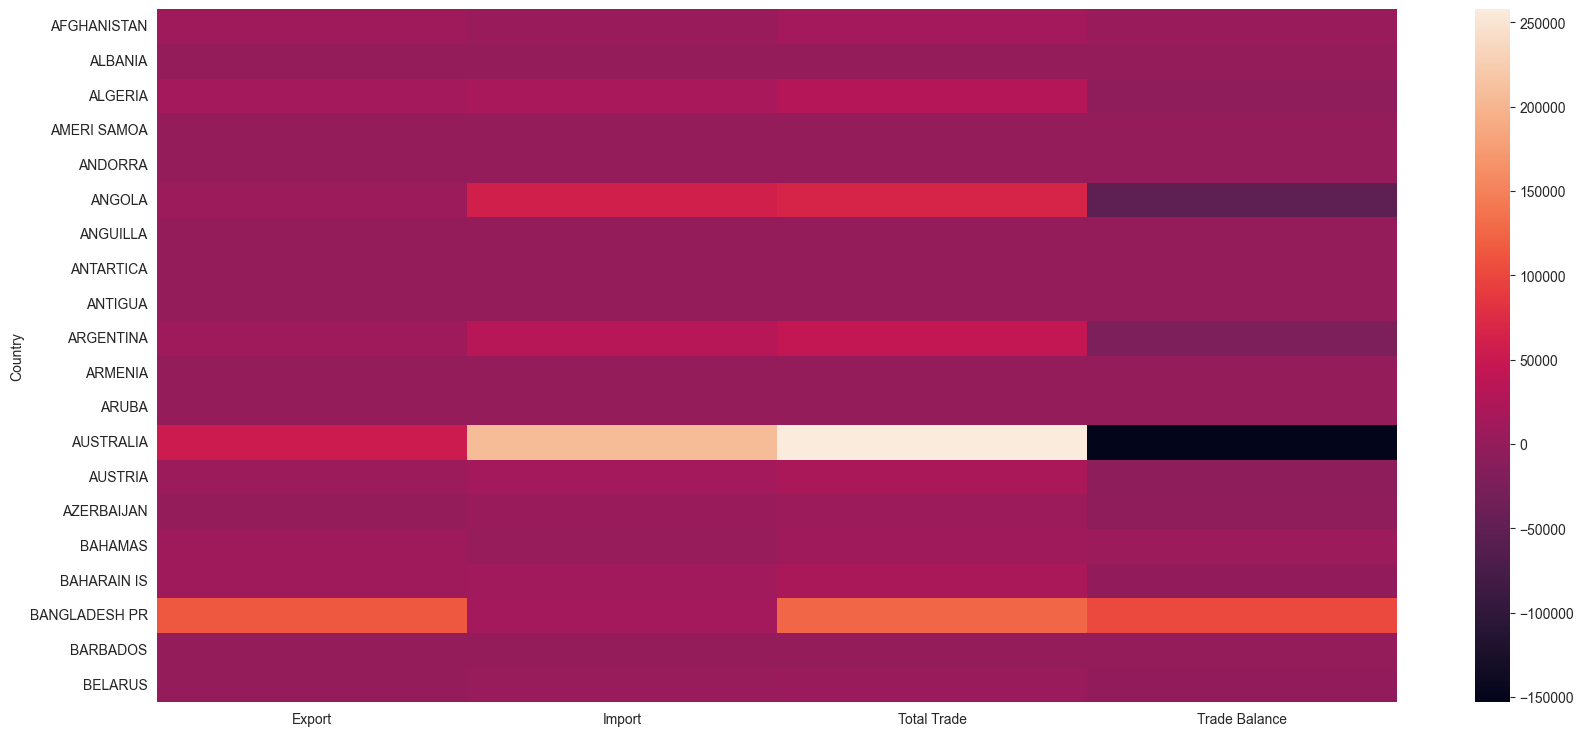

In [72]:
sns.heatmap(country_df.head(20))

Let's explore the trade relation of SENEGAL with India.


#### Q1: What exactly is the trade with India and Senegal

In [73]:
raw_df['Year'] = raw_df['Financial Year(start)'].astype(str) + '-' + raw_df['Financial Year(end)'].astype(str)

In [74]:
senegal_df = raw_df.loc[raw_df['Country']== 'SENEGAL']

In [75]:
senegal_df

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end),Year
4596,SENEGAL,28.97,48.14,77.11,-19.17,1997,1998,1997-1998
4597,SENEGAL,34.22,117.07,151.29,-82.85,1998,1999,1998-1999
4598,SENEGAL,20.06,87.31,107.37,-67.25,1999,2000,1999-2000
4599,SENEGAL,23.77,44.34,68.11,-20.57,2000,2001,2000-2001
4600,SENEGAL,23.03,133.60,156.63,-110.57,2001,2002,2001-2002
4601,SENEGAL,51.35,172.41,223.76,-121.06,2002,2003,2002-2003
4602,SENEGAL,26.74,144.96,171.70,-118.22,2003,2004,2003-2004
4603,SENEGAL,69.24,181.20,250.44,-111.96,2004,2005,2004-2005
4604,SENEGAL,93.50,292.56,386.06,-199.06,2005,2006,2005-2006
4605,SENEGAL,152.18,73.16,225.34,79.02,2006,2007,2006-2007


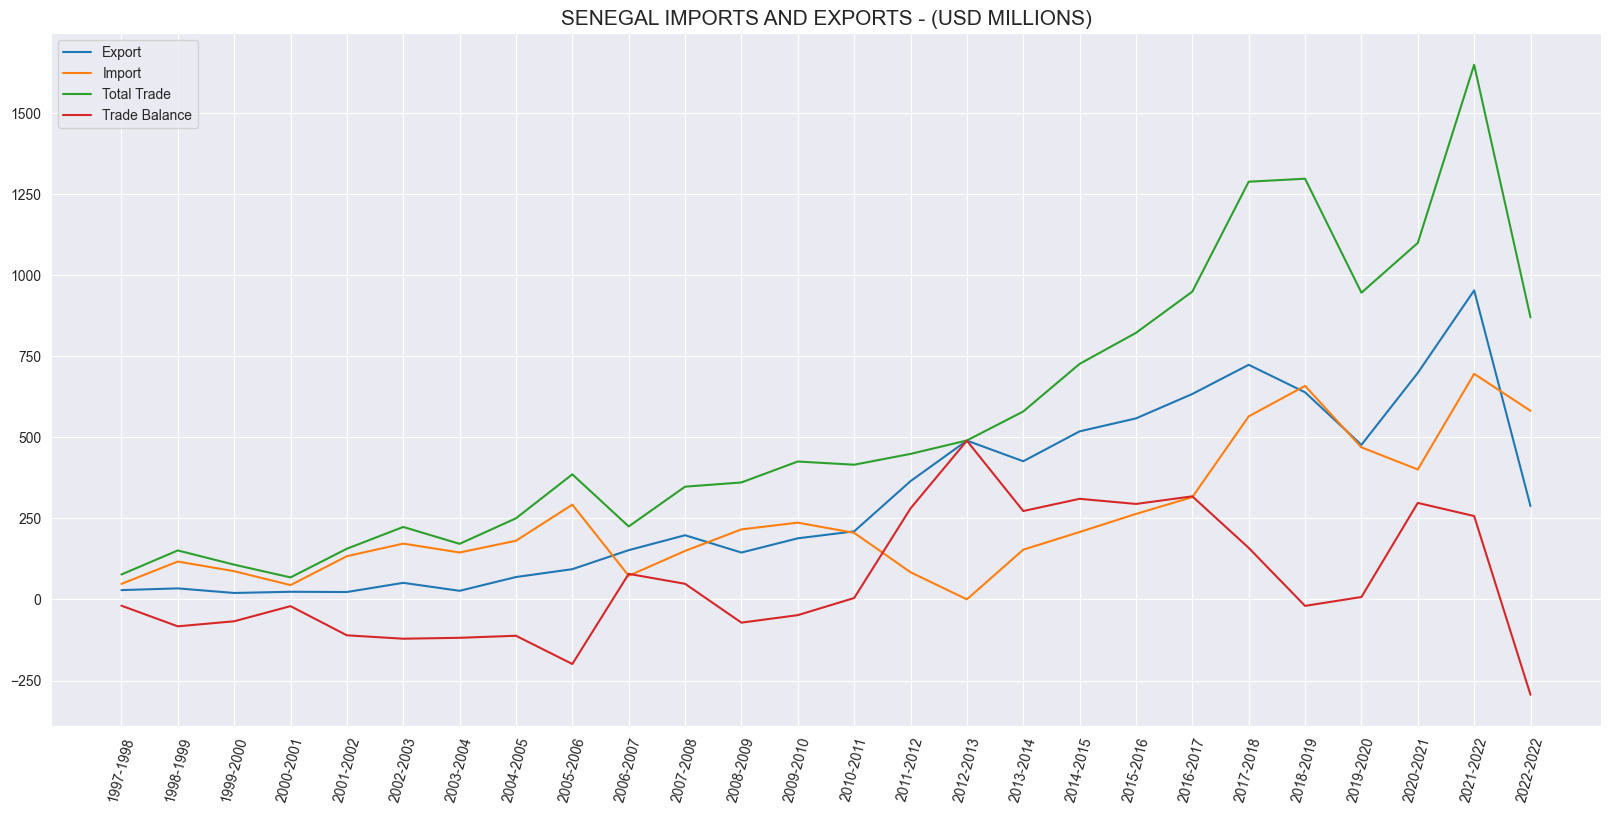

In [76]:
plt.xticks(rotation=75)
plt.title('SENEGAL IMPORTS AND EXPORTS - (USD MILLIONS)', size = 15)
plt.plot(senegal_df.Year, senegal_df.Export)
plt.plot(senegal_df.Year, senegal_df.Import)
plt.plot(senegal_df.Year, senegal_df['Total Trade'])
plt.plot(senegal_df.Year, senegal_df['Trade Balance'])
plt.legend(senegal_df.columns[1:5])

#### Q2: What is the total trade and overall trade balance of Senegal?

In [77]:
senegal_df.describe()

,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,309.209615,250.093462,559.303077,59.116154,2009.500000,2010.461538
std,274.092061,196.075733,433.723864,197.554834,7.648529,7.585411
min,20.060000,0.390000,68.110000,-294.110000,1997.000000,1998.000000
25%,55.822500,121.202500,224.155000,-80.002500,2003.250000,2004.250000
50%,204.185000,193.425000,420.770000,-7.330000,2009.500000,2010.500000
75%,511.622500,310.027500,858.292500,269.017500,2015.750000,2016.750000
max,953.590000,696.160000,1649.750000,489.850000,2022.000000,2022.000000


In [78]:
senegal_df['Total Trade'].sum()

14541.880000000001

In [79]:
senegal_df['Trade Balance'].sum()

1537.02

<Axes: title={'center': 'SENEGAL TRADE BALANCE - (USD MILLIONS)'}, xlabel='Year', ylabel='Trade Balance'>

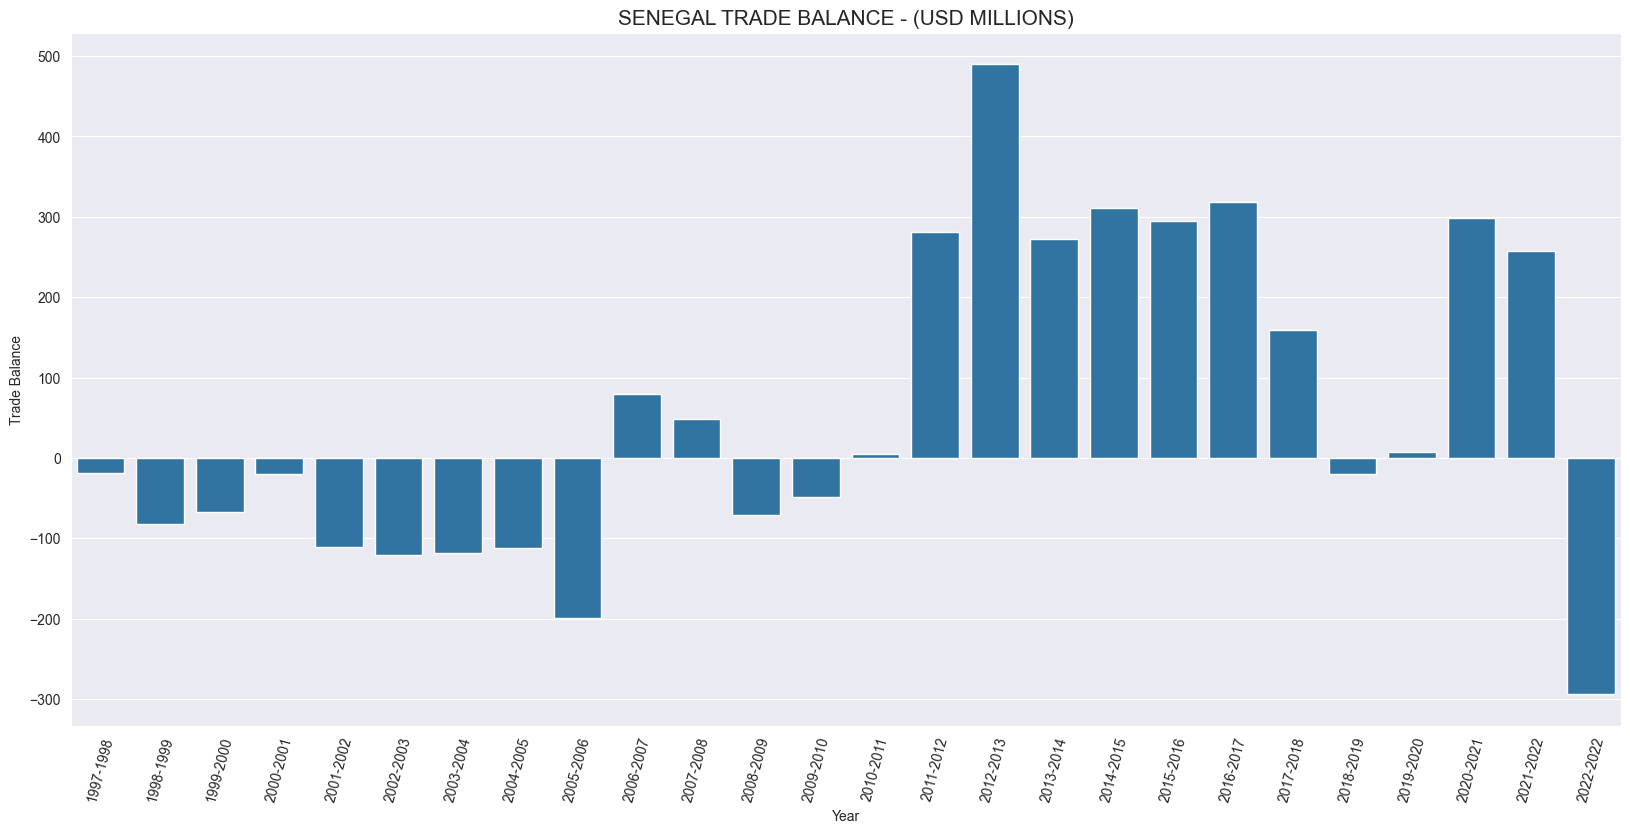

In [80]:
plt.xticks(rotation=75)
plt.title('SENEGAL TRADE BALANCE - (USD MILLIONS)', size = 15)
sns.barplot(x= senegal_df.Year, y= senegal_df['Trade Balance'])

The overall trade balance here is positive that means India's exports is more in Senegal than imports

#### Q3:  What exactly is the trade with India and ETHIOPIA?

In [81]:
ethiopia_df = raw_df.loc[raw_df['Country']== 'ETHIOPIA']

In [82]:
ethiopia_df

,Country,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end),Year
1707,ETHIOPIA,67.51,0.77,68.28,66.74,1997,1998,1997-1998
1708,ETHIOPIA,64.75,0.29,65.04,64.46,1998,1999,1998-1999
1709,ETHIOPIA,57.33,0.87,58.20,56.46,1999,2000,1999-2000
1710,ETHIOPIA,66.57,3.84,70.41,62.73,2000,2001,2000-2001
1711,ETHIOPIA,90.83,18.39,109.22,72.44,2001,2002,2001-2002
1712,ETHIOPIA,61.97,10.55,72.52,51.42,2002,2003,2002-2003
1713,ETHIOPIA,80.43,7.54,87.97,72.89,2003,2004,2003-2004
1714,ETHIOPIA,55.51,10.26,65.77,45.25,2004,2005,2004-2005
1715,ETHIOPIA,74.74,8.52,83.26,66.22,2005,2006,2005-2006
1716,ETHIOPIA,115.94,11.42,127.36,104.52,2006,2007,2006-2007


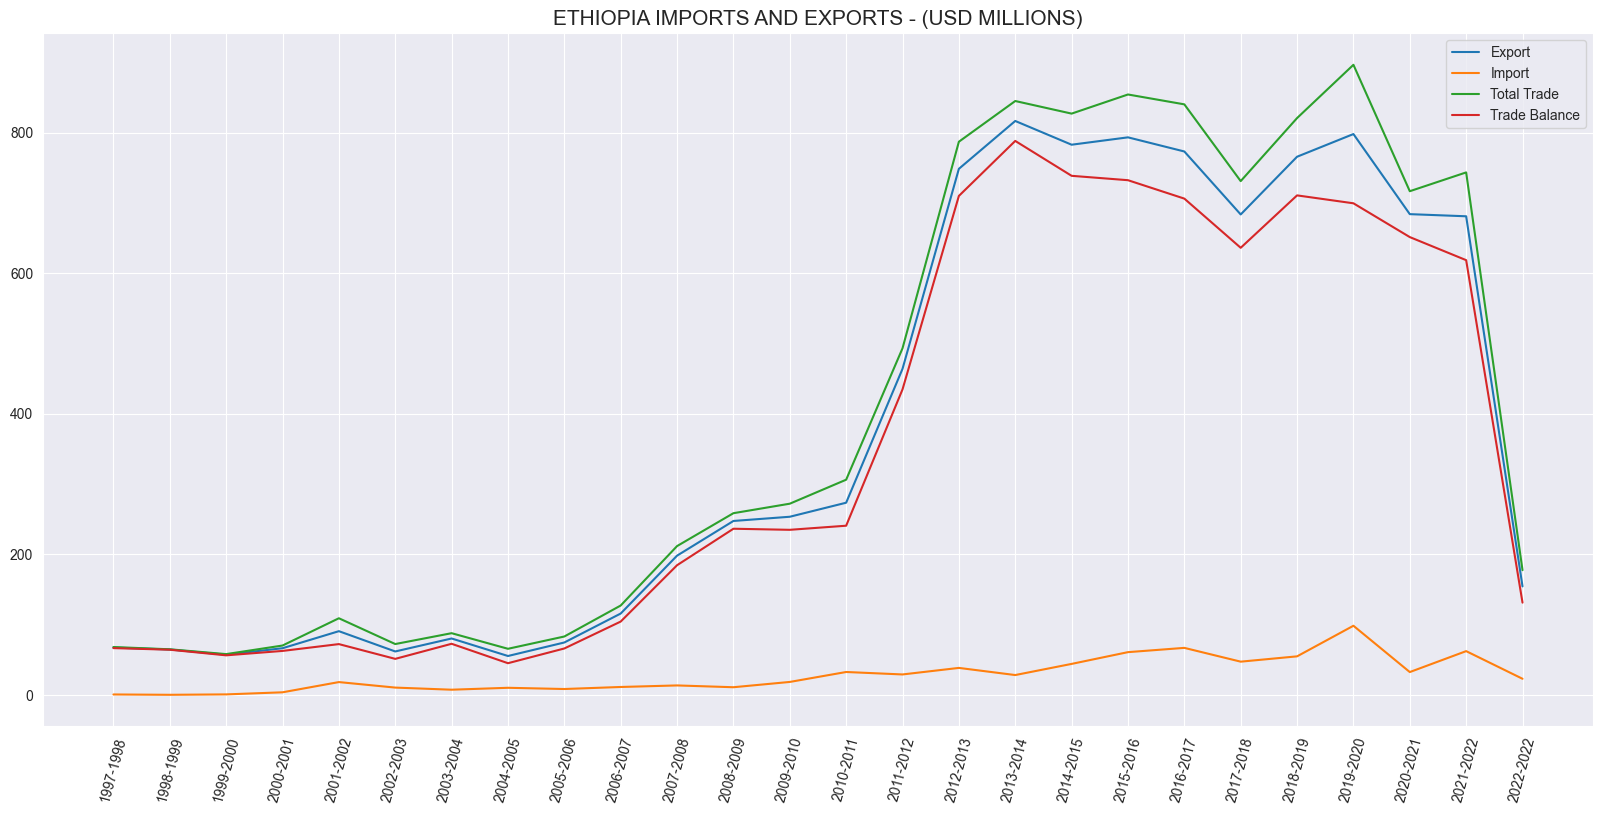

In [83]:
plt.xticks(rotation=75)
plt.title('ETHIOPIA IMPORTS AND EXPORTS - (USD MILLIONS)', size = 15)
plt.plot(ethiopia_df.Year, ethiopia_df.Export)
plt.plot(ethiopia_df.Year, ethiopia_df.Import)
plt.plot(ethiopia_df.Year, ethiopia_df['Total Trade'])
plt.plot(ethiopia_df.Year, ethiopia_df['Trade Balance'])
plt.legend(ethiopia_df.columns[1:5])

#### Q4: What is the total trade and overall trade balance of Ethiopia

In [84]:
ethiopia_df.describe()

,Export,Import,Total Trade,Trade Balance,Financial Year(start),Financial Year(end)
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,379.132308,28.314231,407.446538,350.818077,2009.500000,2010.461538
std,315.776092,24.919969,337.323954,294.760311,7.648529,7.585411
min,55.510000,0.290000,58.200000,45.250000,1997.000000,1998.000000
25%,76.162500,10.332500,84.437500,68.165000,2003.250000,2004.250000
50%,250.675000,20.840000,265.500000,235.850000,2009.500000,2010.500000
75%,732.695000,42.835000,776.465000,687.740000,2015.750000,2016.750000
max,816.920000,98.550000,896.860000,788.520000,2022.000000,2022.000000


In [85]:
ethiopia_df['Total Trade'].sum()

10593.609999999999

In [86]:
ethiopia_df['Trade Balance'].sum()

9121.269999999999

<Axes: title={'center': 'ETHIOPIA TRADE BALANCE - (USD MILLIONS)'}, xlabel='Year', ylabel='Trade Balance'>

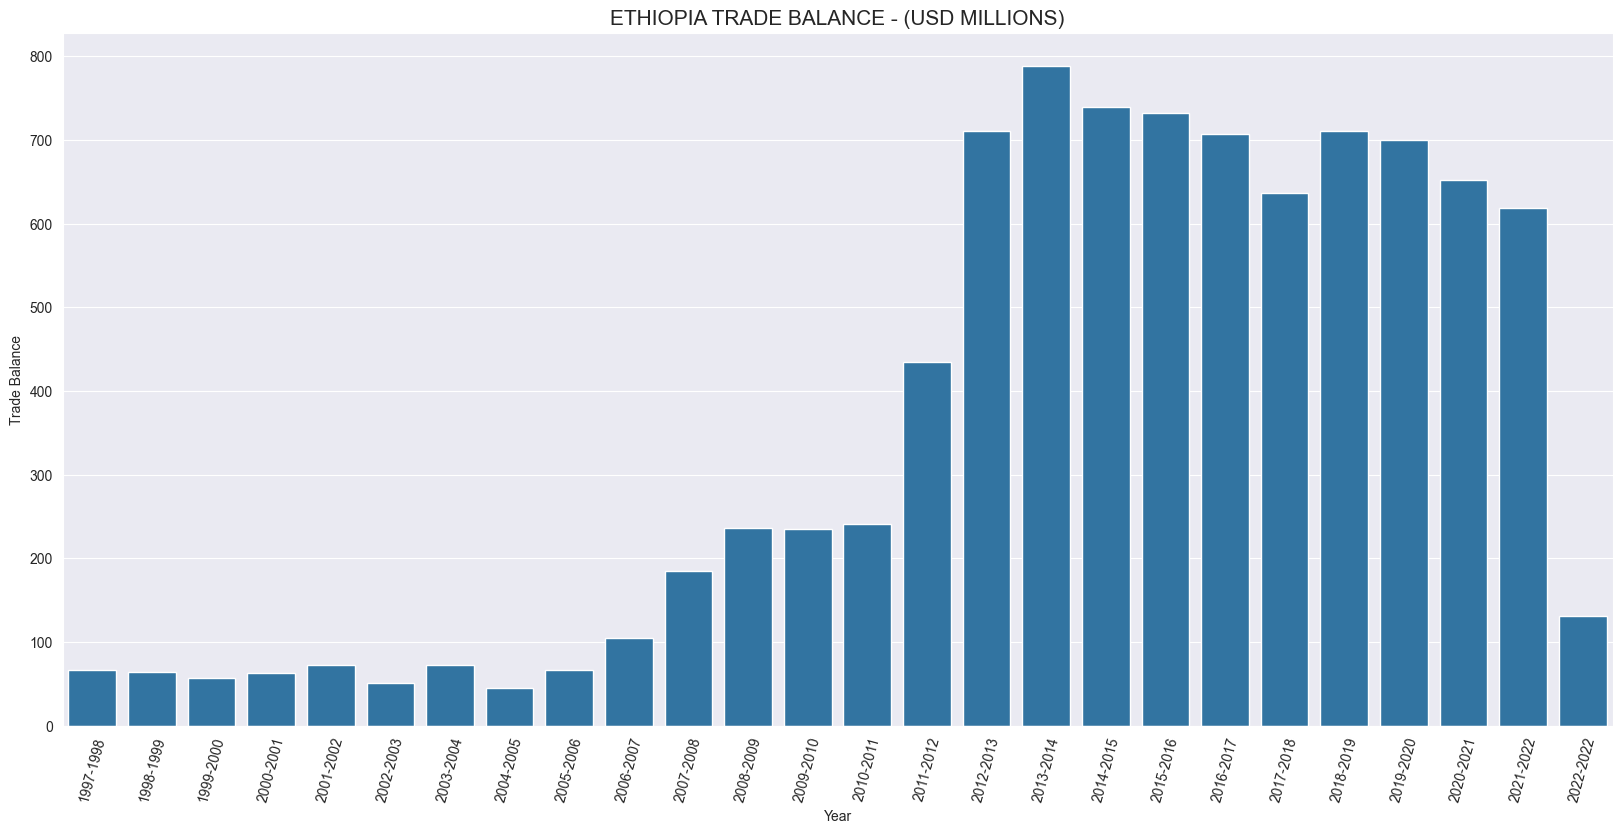

In [87]:
plt.xticks(rotation=75)
plt.title('ETHIOPIA TRADE BALANCE - (USD MILLIONS)', size = 15)
sns.barplot(x= ethiopia_df.Year, y= ethiopia_df['Trade Balance'])

The overall trade balance here is positive that means India exports more than imports

#### Q5: Compare the trade relation of India-Senegal with India-Ethiopia

In [88]:
senegal_year_df = senegal_df.groupby('Year')[['Export', 'Import', 'Total Trade', 'Trade Balance']].sum()

In [89]:
senegal_year_df

,Export,Import,Total Trade,Trade Balance
Year,,,,
1997-1998,28.97,48.14,77.11,-19.17
1998-1999,34.22,117.07,151.29,-82.85
1999-2000,20.06,87.31,107.37,-67.25
2000-2001,23.77,44.34,68.11,-20.57
2001-2002,23.03,133.60,156.63,-110.57
2002-2003,51.35,172.41,223.76,-121.06
2003-2004,26.74,144.96,171.70,-118.22
2004-2005,69.24,181.20,250.44,-111.96
2005-2006,93.50,292.56,386.06,-199.06


In [90]:
ethiopia_year_df = ethiopia_df.groupby('Year')[['Export', 'Import', 'Total Trade', 'Trade Balance']].sum()

In [91]:
ethiopia_year_df

,Export,Import,Total Trade,Trade Balance
Year,,,,
1997-1998,67.51,0.77,68.28,66.74
1998-1999,64.75,0.29,65.04,64.46
1999-2000,57.33,0.87,58.20,56.46
2000-2001,66.57,3.84,70.41,62.73
2001-2002,90.83,18.39,109.22,72.44
2002-2003,61.97,10.55,72.52,51.42
2003-2004,80.43,7.54,87.97,72.89
2004-2005,55.51,10.26,65.77,45.25
2005-2006,74.74,8.52,83.26,66.22


In [92]:
# comparing the senegal and ethiopia dataset
com_df = senegal_year_df.compare(ethiopia_year_df, align_axis=1, keep_equal=False, keep_shape=False)

In [93]:
com_df

Export          Import        Total Trade         Trade Balance  \
             self   other    self  other        self   other          self   
Year                                                                         
1997-1998   28.97   67.51   48.14   0.77       77.11   68.28        -19.17   
1998-1999   34.22   64.75  117.07   0.29      151.29   65.04        -82.85   
1999-2000   20.06   57.33   87.31   0.87      107.37   58.20        -67.25   
2000-2001   23.77   66.57   44.34   3.84       68.11   70.41        -20.57   
2001-2002   23.03   90.83  133.60  18.39      156.63  109.22       -110.57   
2002-2003   51.35   61.97  172.41  10.55      223.76   72.52       -121.06   
2003-2004   26.74   80.43  144.96   7.54      171.70   87.97       -118.22   
2004-2005   69.24   55.51  181.20  10.26      250.44   65.77       -111.96   
2005-2006   93.50   74.74  292.56   8.52      386.06   83.26       -199.06   
2006-2007  152.18  115.94   73.16  11.42      225.34  127.36         79.02   
2007-2008  198.21  198.32  149.83  13.62      348.04  211.94         48.38   
2008-2009  144.82  247.68  216.28  11.06      361.10  258.74        -71.46   
2009-2010  188.70  253.67  237.03  18.59      425.73  272.26        -48.33   
2010-2011  210.16  273.66  205.65  32.74      415.81  306.40          4.51   
2011-2012  365.05  464.17   84.14  29.25      449.19  493.42        280.91   
2012-2013  490.24  748.82    0.39  38.56      490.63  787.38        489.85   
2013-2014  426.48  816.92  153.60  28.40      580.08  845.32        272.88   
2014-2015  518.75  783.13  208.13  44.26      726.88  827.39        310.62   
2015-2016  558.71  793.62  263.95  60.99      822.66  854.61        294.76   
2016-2017  634.10  773.50  315.85  67.07      949.95  840.57        318.25   
2017-2018  724.11  683.88  564.94  47.45     1289.05  731.33        159.17   
2018-2019  639.24  766.03  658.99  55.01     1298.23  821.04        -19.75   
2019-2020  477.10  798.31  469.47  98.55      946.57  896.86          7.63   
2020-2021  699.10  684.32  401.13  32.64     1100.23  716.96        297.97   
2021-2022  953.59  681.28  696.16  62.44     1649.75  743.72        257.43   
2022-2022  288.03  154.55  582.14  23.09      870.17  177.64       -294.11   

                   
            other  
Year               
1997-1998   66.74  
1998-1999   64.46  
1999-2000   56.46  
2000-2001   62.73  
2001-2002   72.44  
2002-2003   51.42  
2003-2004   72.89  
2004-2005   45.25  
2005-2006   66.22  
2006-2007  104.52  
2007-2008  184.70  
2008-2009  236.62  
2009-2010  235.08  
2010-2011  240.92  
2011-2012  434.92  
2012-2013  710.26  
2013-2014  788.52  
2014-2015  738.87  
2015-2016  732.63  
2016-2017  706.43  
2017-2018  636.43  
2018-2019  711.02  
2019-2020  699.76  
2020-2021  651.68  
2021-2022  618.84  
2022-2022  131.46

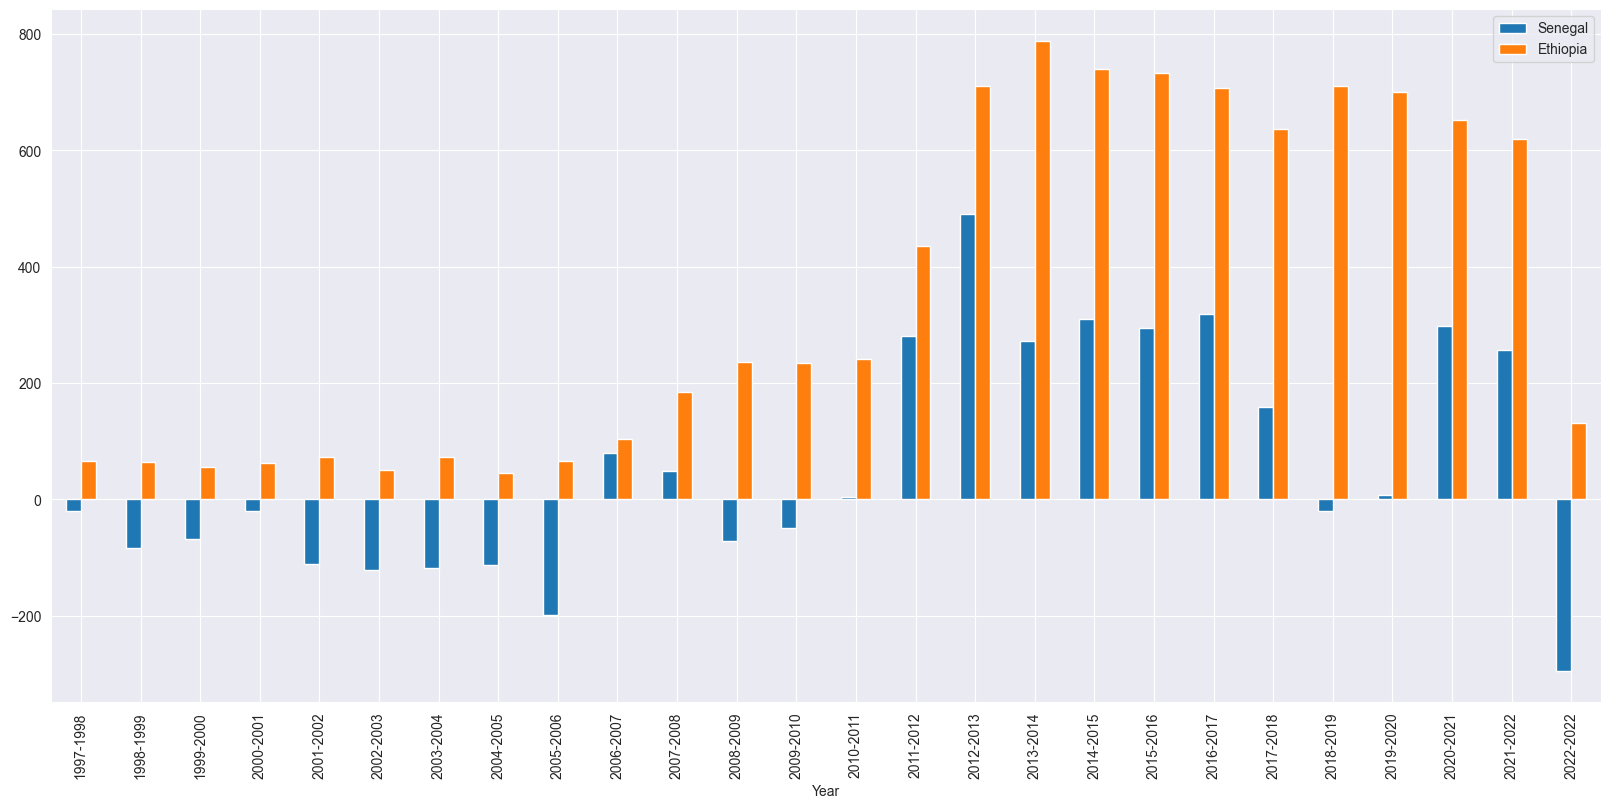

In [94]:
com_df['Trade Balance'].plot(kind='bar')
plt.legend(['Senegal', 'Ethiopia'])

As we can see, the overall trade balance of Ethiopia is higher than Senegal which indicate India export more to Ethiopia than Senegal.

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

From the above analysis, we have seen that India trade with multiple countries. USA is the major importer of goods from India and China is the major exporter of goods to India.
In the above comparison we observe that the overall trade balance of Ethiopia is higher than Senegal which means India export more to Ethiopia than Senegal.


## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

opendatasets Python library: https://github.com/JovianML/opendatasets